In this file, I explored the effects of changing initial parameters on background evoluiton. Specifically, I observed the shift of the proportion of different energy densities with respect to incrementally increasing or decreasing hubble constant, initial power spectrum, baryonic energy density, and cold dark matter energy density. 

# Setups

## Copying the imports

In [1]:
import numpy as np
from classy import Class
import matplotlib as mpl+
import matplotlib.pyplot as plt

In [12]:
# some plotting settings to make figures prettier :)
mpl.rcParams['text.usetex'] = False
mpl.rcParams['xtick.labelsize'] = 15
mpl.rcParams['ytick.labelsize'] = 15
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['legend.fontsize'] = 13
mpl.rcParams['xtick.major.size'] = 8
mpl.rcParams['ytick.major.size'] = 8
mpl.rcParams['xtick.minor.size'] = 5
mpl.rcParams['ytick.minor.size'] = 5
#plt.rcParams["font.family"] = "Times New Roman"

Config tells the input parameters and what to output/compute\
For fuller descriptions of parameter, go to explanatory.ini; for default values, go to default.ini

## Config 

1. Try updating value; changing directly then use "config.update({'parameter1_name': new_value1})"

$\textbf{h}$\
reduced hubble parameter\
expansion rate at present day, does not affect much the radiation line,\
makes matter and $\Lambda$ line converge more rapidly,\
for some reson blows up ($\Omega > 1$) when h $\approx$ 0.4 

$\textbf{A\_s}$\
curvature power spectrum at $\textbf{pivot scale}$ -- "k_pivot = 0.05", $\textit{primordial parameter}$\
A_s does not affect background evolution
A_s represent the clumpiness of the the initial power spectrum. It is a result of quantum fluctuations and here given as a default.
k_pivot is the maximum scale in the clumpiness.

$\textbf{omega\_b}$: all parameters presented are the present day value \
reduced energy density for baryonic matter: default = 0.023828 $\textbf{see default.ini, which is beginner-intended}$\
"unrealistic high values": $\approx 0.04$ -- "The corresponding value of the primordial helium fraction cannot be found in the interpolation table."
Answer: in early universe, hydrogen fused to become helium just like is does in stars. The values of helium produced is pivotal to the evolution of the universe but cumbersome to calculate. Thus all probable results are recorded in a look-up table. 

$\textbf{omega\_cdm}$\
cold dark matter.\
The increase of it results in background evolution similar to the decrease of hubble parameter:\
    omega_m flattens at 100% (around 0.43) then increases pass it\
    omega_lambda "matched by budget equation"
    

Since all values are present day values. Some "blow-up" can be a result of unrealistic high values which the model needs to be "un-physical to achieve". 


# background evolution

We are incrementing h from 0.6781 by factor of 0.1


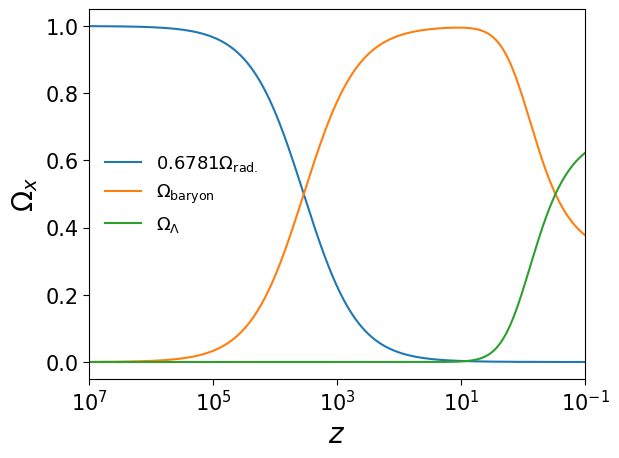

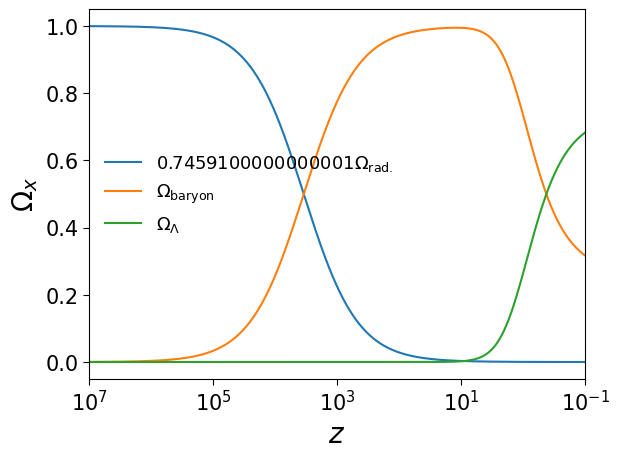

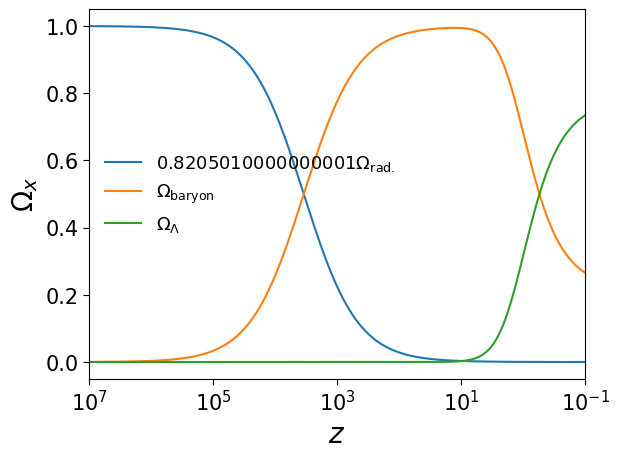

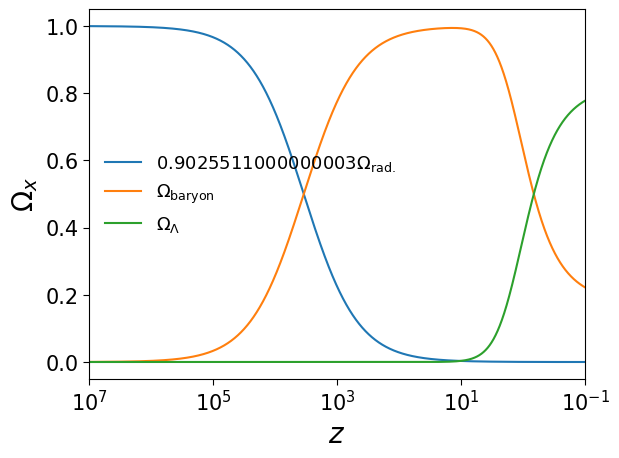

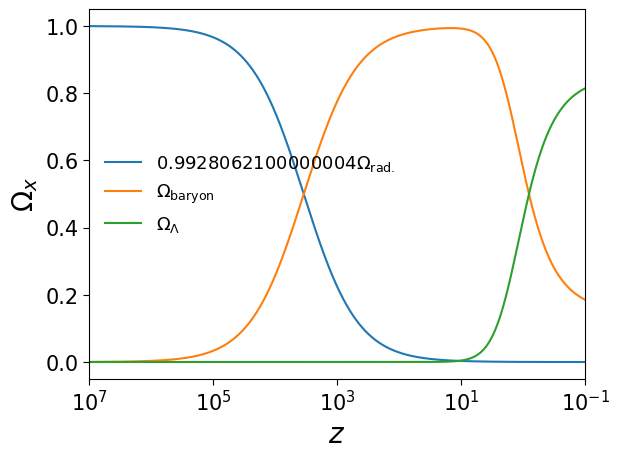

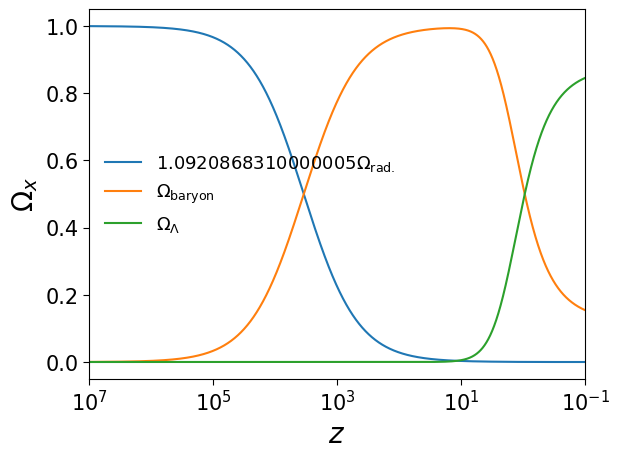

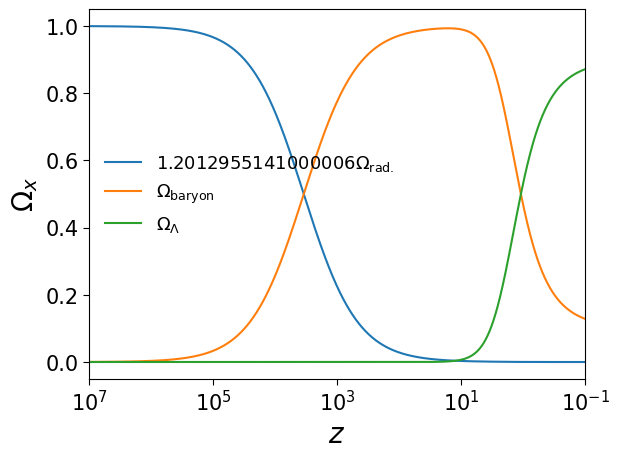

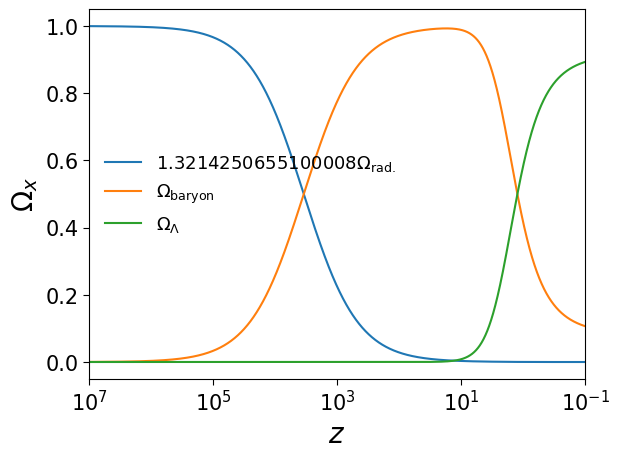

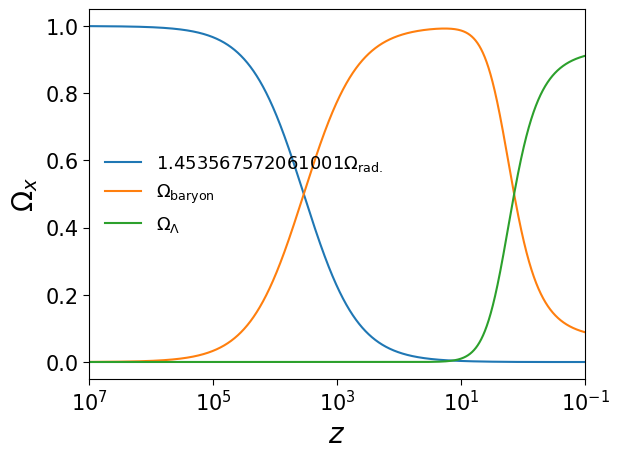

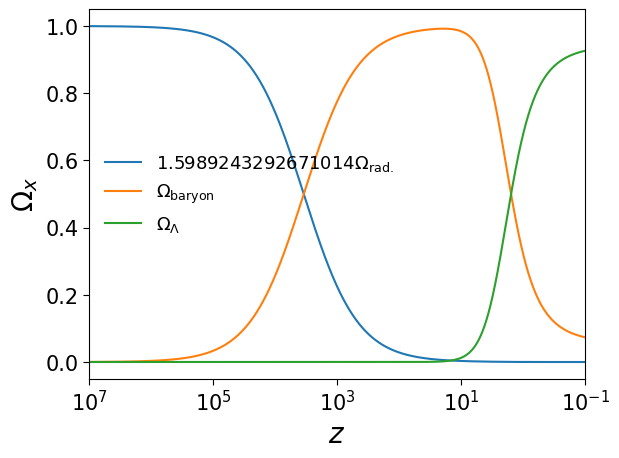

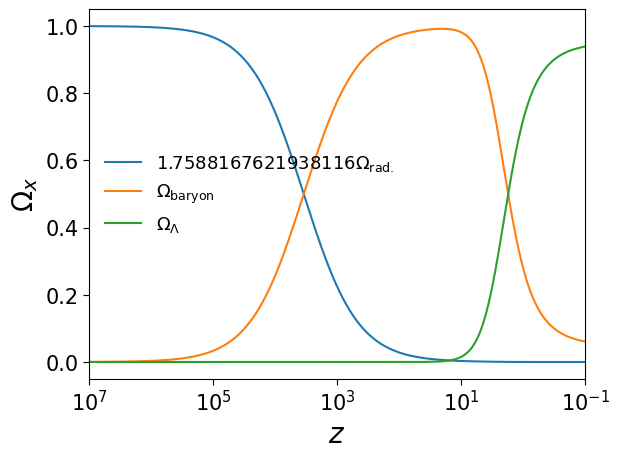

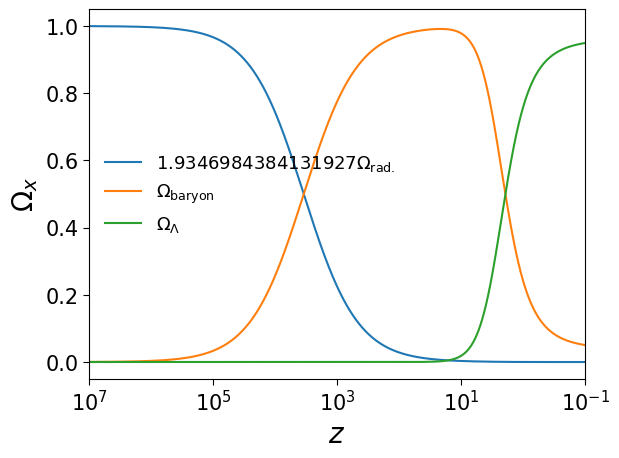

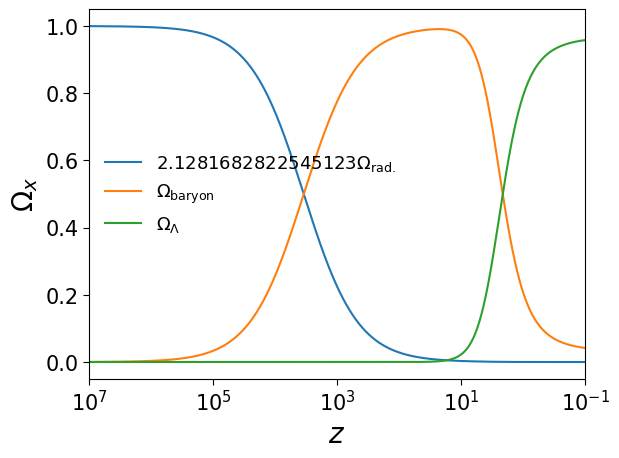

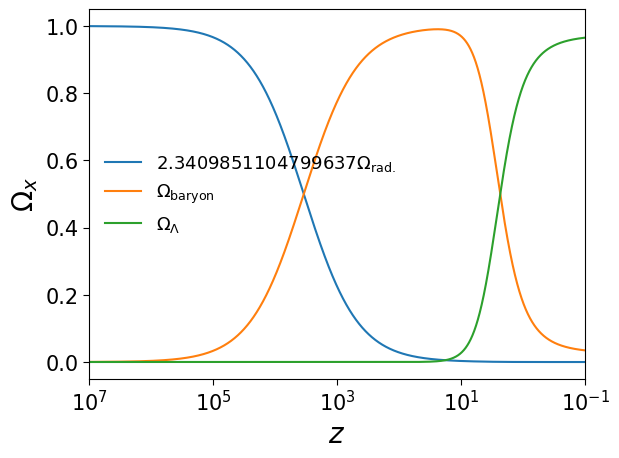

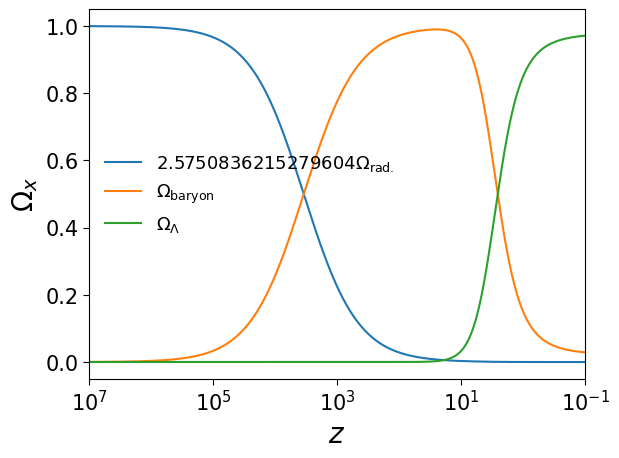

In [33]:
config = {
    # cosmo parameters:
    'h': 0.67810, 
    'A_s': 2.100549e-09, 
    'omega_b': 0.0238280, 
    
    'omega_cdm': 0.1201075, 
    'N_ur': 3.044, 
    'z_pk': 0, 
    
    'output' : 'tCl,pCl,lCl,mPk',
    

    # precision parameters:
    'lensing': 'yes', 
    'P_k_max_1/Mpc': 1., 
    'l_max_scalars': 2500, 
}

####################################################################

increased_proportion = 0.1
parameter = 'h'
original_value = config[parameter]
print(f"We are incrementing {parameter} from {original_value} by factor of {increased_proportion}")
for i in range(15):
    config.update({parameter: original_value * (1+increased_proportion)**i})
    
    cosmo = Class() 
    cosmo.set(config)
    cosmo.compute()

    ba = cosmo.get_background()

    z = ba['z']
    t = ba['proper time [Gyr]']
    rho_m = ba['(.)rho_cdm']+ba['(.)rho_b']
    #rho_cdm = ba['(.)rho_cdm']
    #rho_b = ba['(.)rho_b']
    #matter density = cdm + b (+ neutrinos at late times)
    rho_r = ba['(.)rho_g']+ba['(.)rho_ur'] 
    # radiation density = photons (+ neutrinos at early times)
    rho_lambda = ba['(.)rho_lambda']
    rho_tot = ba['(.)rho_tot']

    f = plt.figure()
    plt.semilogx(z, rho_r/rho_tot, label=str(config[parameter])+r'$\Omega_{\mathrm{rad.}}$')
    plt.semilogx(z, rho_m/rho_tot, label=r'$\Omega_{\mathrm{baryon}}$')
    #plt.semilogx(z, rho_b/rho_tot, label=r'$\Omega_{\mathrm{baryon}}$')
    #plt.semilogx(z, rho_cdm/rho_tot, label=r'$\Omega_{\mathrm{cdm}}$')
    plt.semilogx(z, rho_lambda/rho_tot, label=r'$\Omega_{\Lambda}$')

    plt.xlabel('$z$')
    plt.ylabel('$\Omega_{x}$')
    plt.legend(frameon=False)
    plt.xlim(1e7, 1e-1)